In [1]:
# Cell 1: Import libraries and suppress warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [6]:
# Cell 2: Load dataset and assign column names
column_names = [
    "CRIM",      # per capita crime rate by town
    "ZN",        # proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS",     # proportion of non-retail business acres per town
    "CHAS",      # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",       # nitric oxides concentration (parts per 10 million)
    "RM",        # average number of rooms per dwelling
    "AGE",       # proportion of owner-occupied units built prior to 1940
    "DIS",       # weighted distances to five Boston employment centers
    "RAD",       # index of accessibility to radial highways
    "TAX",       # full-value property-tax rate per $10,000
    "PTRATIO",   # pupil-teacher ratio by town
    "B",         # 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
    "LSTAT",     # % lower status of the population
    "MEDV"       # Median value of owner-occupied homes in $1000s
]

df = pd.read_csv("housing_boston.csv", header=None, names=column_names)
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Cell 3: Dataset Overview
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())


Shape of dataset: (452, 14)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    int64  
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    int64  
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 49.6 KB
None


In [8]:
# Cell 4: Check for missing values
print("Missing values:\n")
print(df.isnull().sum())


Missing values:

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [9]:
# Cell 5: Summary statistics
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


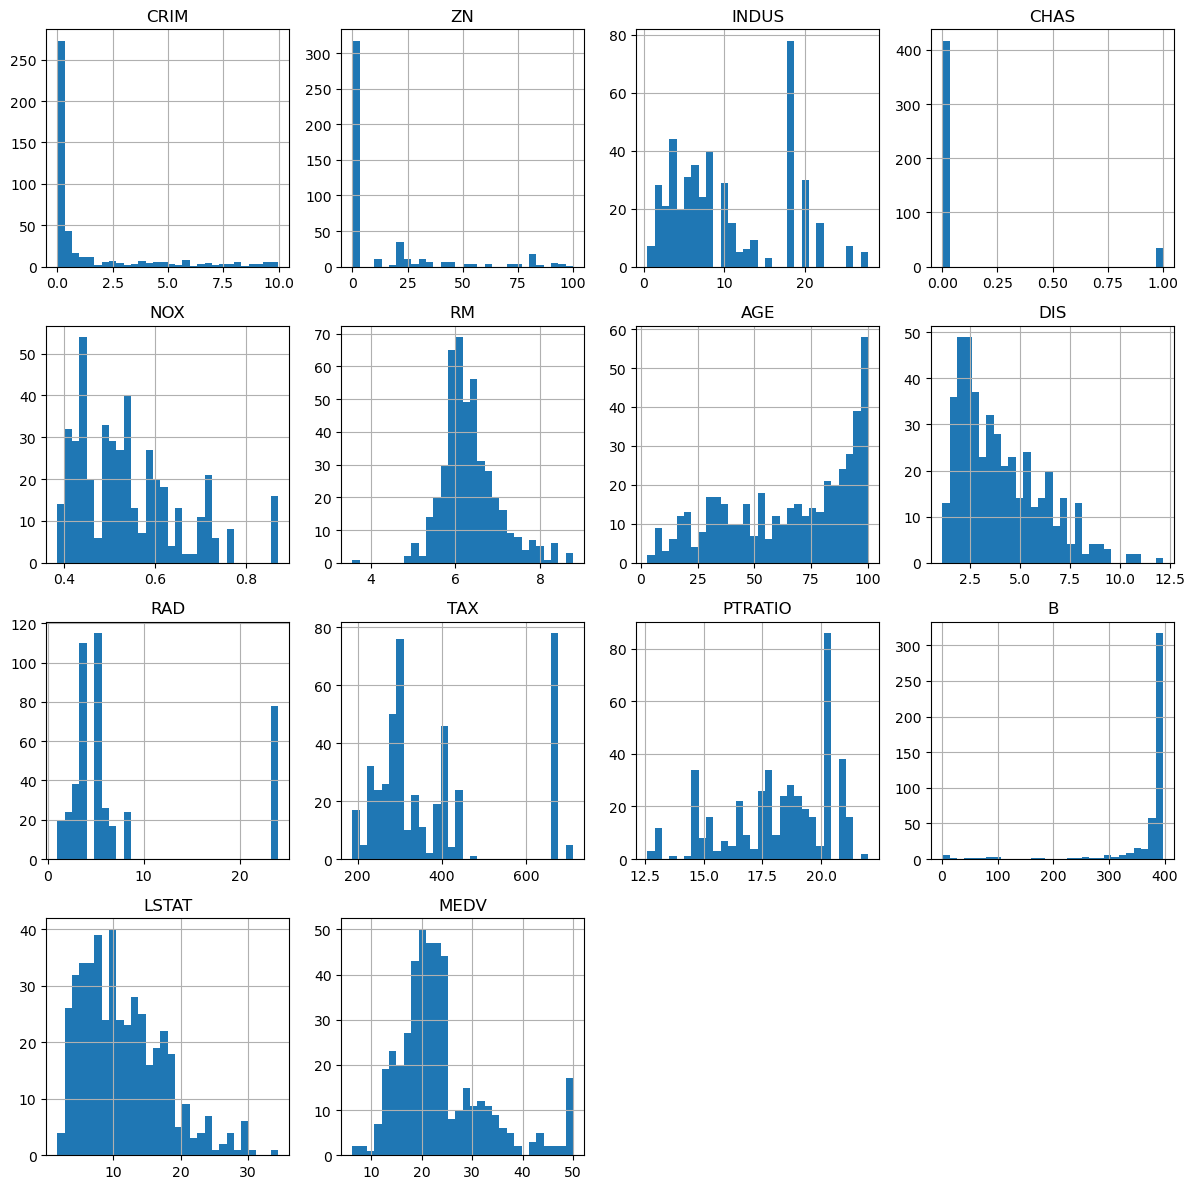

In [10]:
# Cell 6: Exploratory Data Analysis – Histogram for each feature
df.hist(figsize=(12, 12), bins=30)
plt.tight_layout()
plt.show()


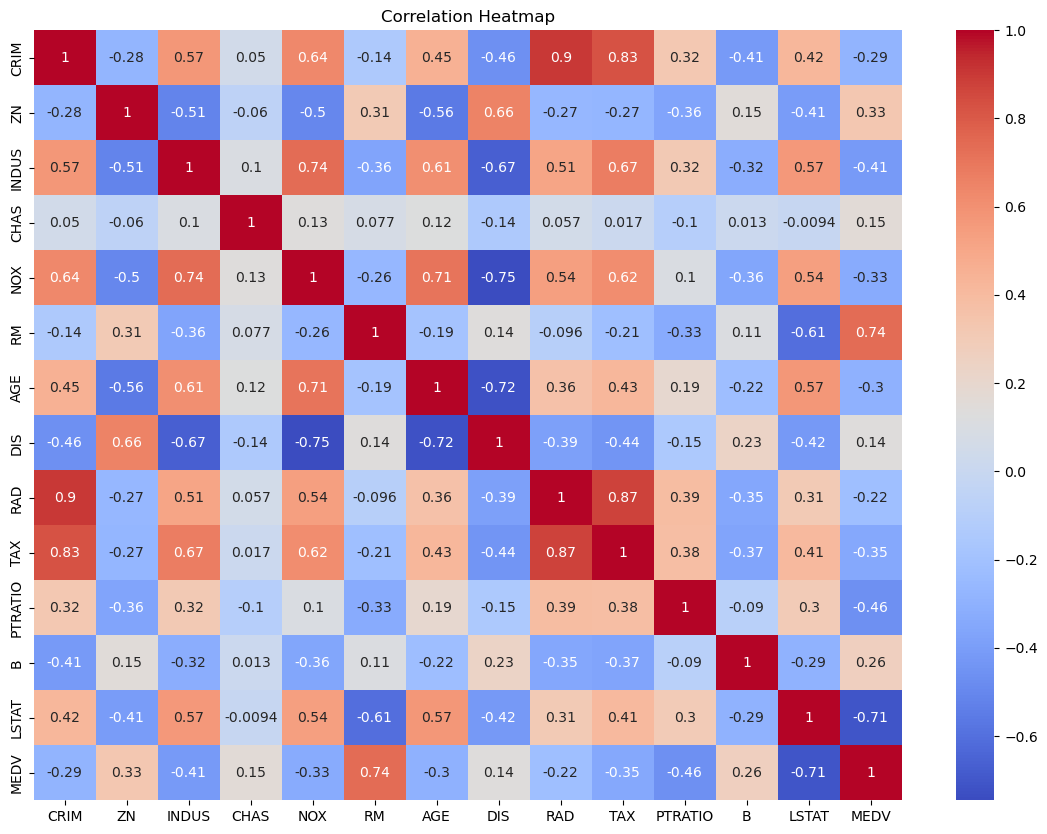

In [11]:
# Cell 7: Correlation heatmap
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Cell 8: Define predictors and target variable
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [13]:
# Cell 9: Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [14]:
# Cell 10: Model Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients


,Coefficient
CRIM,-0.238025
ZN,0.038221
INDUS,0.051356
CHAS,2.435048
NOX,-11.657986
RM,5.110158
AGE,-0.006094
DIS,-1.271514
RAD,0.294444
TAX,-0.011360


In [16]:
# Cell 11: Create two new community records
new_data = pd.DataFrame({
    "CRIM": [0.05, 10.0],
    "ZN": [25.0, 0.0],
    "INDUS": [5.0, 20.0],
    "CHAS": [0, 1],
    "NOX": [0.45, 0.7],
    "RM": [7.0, 5.5],
    "AGE": [30.0, 95.0],
    "DIS": [6.0, 1.5],
    "RAD": [1, 24],
    "TAX": [300, 666],
    "PTRATIO": [15.0, 21.0],
    "B": [390.0, 350.0],
    "LSTAT": [5.0, 17.0]
})
new_data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.05,25.0,5.0,0,0.45,7.0,30.0,6.0,1,300,15.0,390.0,5.0
1,10.00,0.0,20.0,1,0.70,5.5,95.0,1.5,24,666,21.0,350.0,17.0


In [17]:
# Cell 12: Predict house prices for new records
predicted_prices = model.predict(new_data)
print("Predicted median house prices (in $1000s):", predicted_prices)


Predicted median house prices (in $1000s): [31.39971231 16.91393103]


In [18]:
# Cell 13: 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)

print("10-Fold Cross-Validation RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


10-Fold Cross-Validation RMSE scores: [4.78361544 3.12706049 3.00311312 4.827015   5.35522771 5.41349758
 4.31982041 4.07128876 7.14939697 3.49935883]
Average RMSE: 4.554939432340502
